### M&DL 01

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv("C:/BigData/Kaggle/ML&DataSurvey2017/schema.csv")
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [5]:
mcq = pd.read_csv("C:/BigData/Kaggle/ML&DataSurvey2017/multipleChoiceResponses.csv", encoding='ISO-8859-1' )
mcq.shape

(16716, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


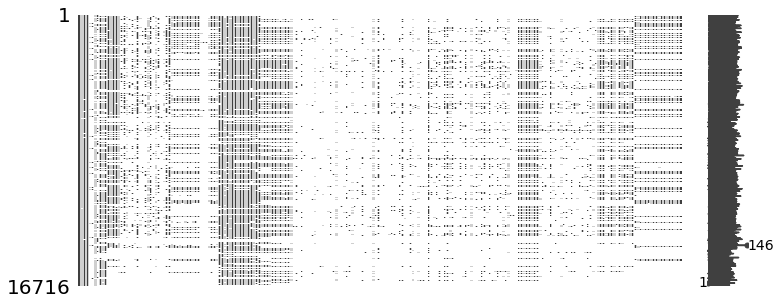

In [9]:
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

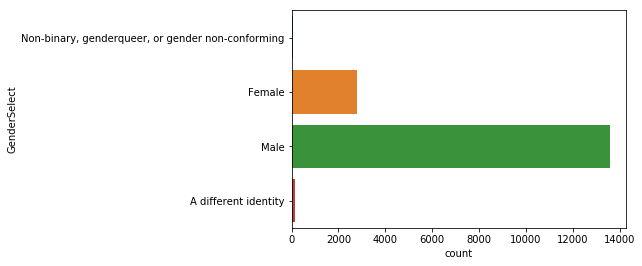

In [10]:
sns.countplot(y='GenderSelect', data=mcq)

In [11]:
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df['국가'] = con_df.index
con_df.columns = ['응답수', '국가']
con_df = con_df.reset_index().drop('index', axis=1)
con_df

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [12]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

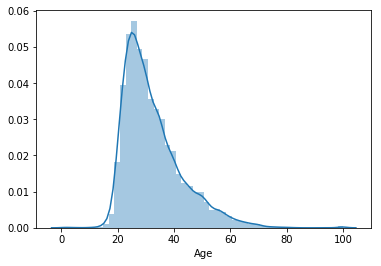

In [13]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

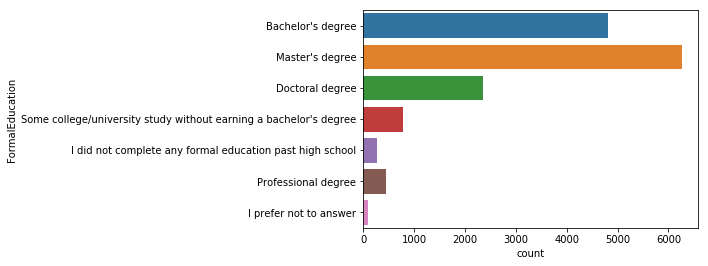

In [14]:
sns.countplot(y='FormalEducation', data=mcq)

In [15]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True,right_index=True
)
mcq_major_df.columns=['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


In [16]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

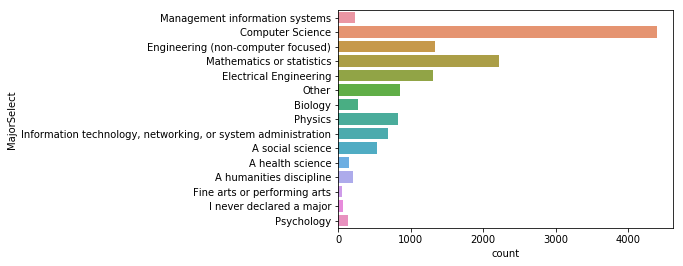

In [17]:
sns.countplot(y='MajorSelect', data=mcq)

In [18]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df

,EmploymentStatus_x,EmploymentStatus_y
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


In [19]:
mcq_es_df.columns = ['응답수','비율']
mcq_es_df

,응답수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


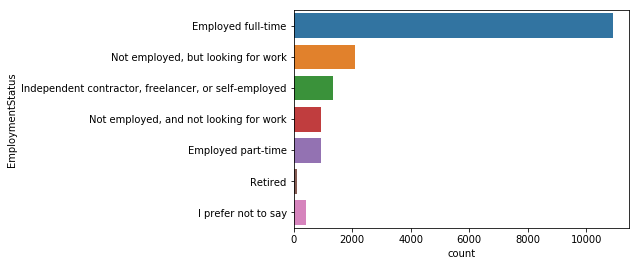

In [20]:
sns.countplot(y='EmploymentStatus', data=mcq)

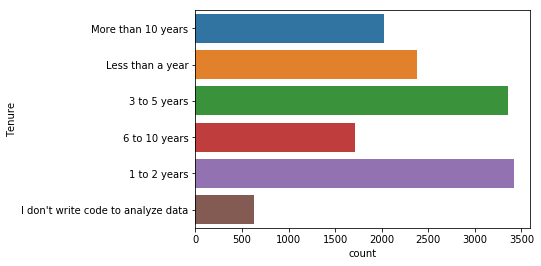

In [21]:
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea : 194


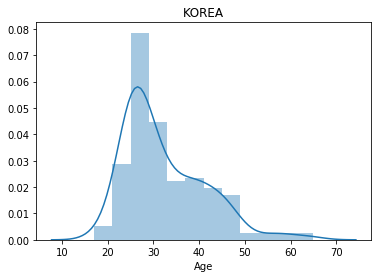

In [22]:
korea = mcq.loc[(mcq['Country'] == 'South Korea')]

print('The number of interviewees in Korea : ' + str(korea.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.title("KOREA")
plt.show()

In [23]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


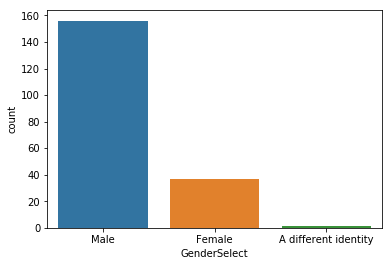

In [24]:
sns.countplot(x='GenderSelect', data=korea)
plt.show()

Text(0.5, 1.0, 'Korean Male')

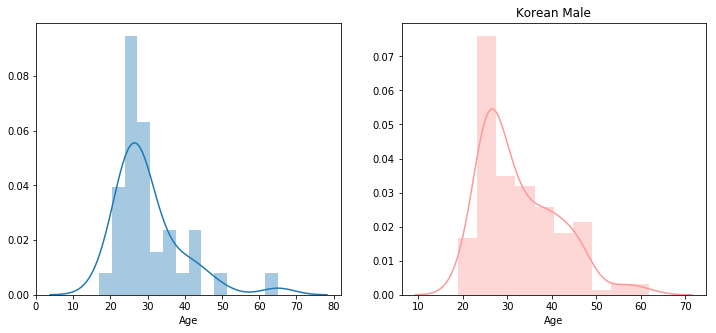

In [25]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect'] =="Female"].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[1], ax= ax1)
plt.title('Korean Female')
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax2)
plt.title('Korean Male')

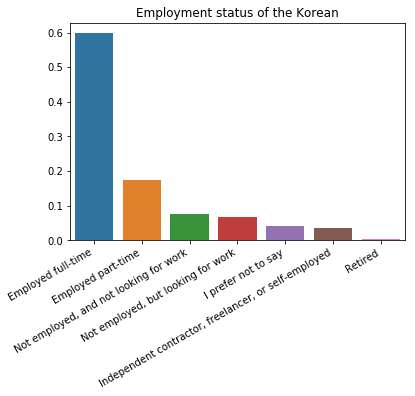

In [26]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts(normalize=True))
plt.xticks(rotation=30, ha='right')
plt.title("Employment status of the Korean")
plt.ylabel("")
plt.show()

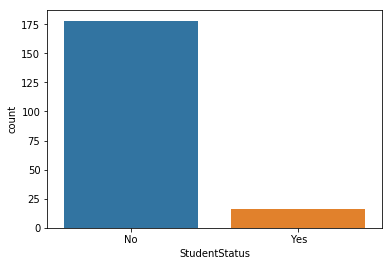

In [27]:
korea['StudentStatus'] = korea['StudentStatus'].fillna("No")
sns.countplot(x='StudentStatus', data=korea)
plt.show()

In [28]:
mcq.to_excel("c:/BigData/Kaggle/ML&DataSurvey2017/01. mcq.xlsx" , encoding='utf-8')

In [29]:
full_time = mcq.loc[(mcq['EmploymentStatus'] =='Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


### M&DL 02

#### 설문조사 응답분석 2
자주 묻는말 FAQ


Q1. python과 R 중에 어떤 언어를 배워야 할까? 

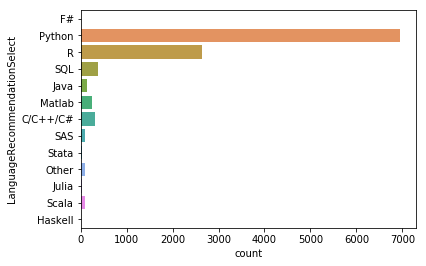

In [30]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)


 - 파이썬이 압도적으로 선호하고 있으며, 전문가와 강사들이 선호하는 언어를 알아본다.

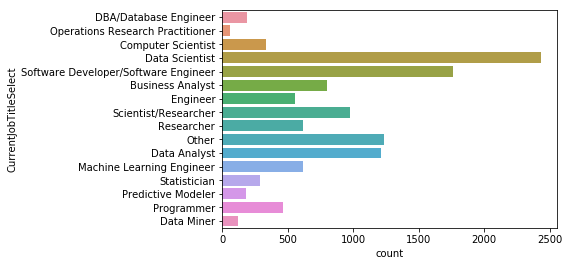

In [31]:
# 현재하는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [32]:
# 현재하는 일에 대한 전체 응답수 
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7737, 228)


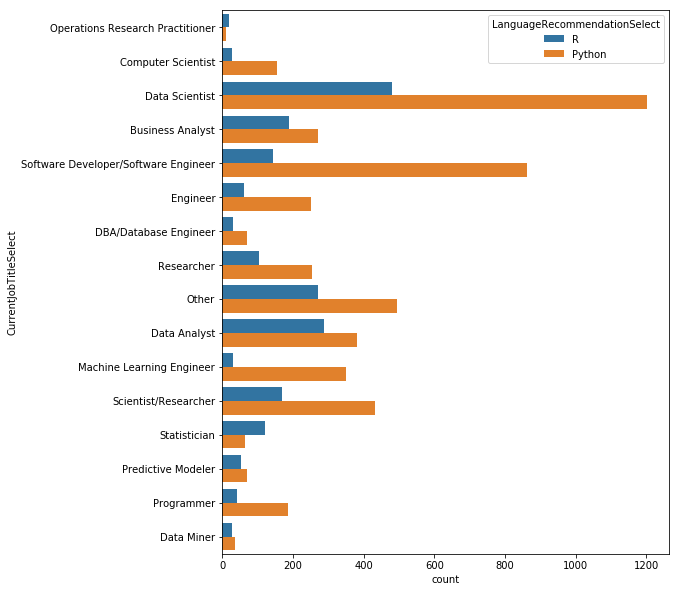

In [33]:
# 현재 하는일에 대해 응답을 해준 사람 중 python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼수 있다.

data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ( mcq['LanguageRecommendationSelect'] =='Python') | (mcq['LanguageRecommendationSelect'] =='R')]
print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)


 데이터 사이언티스트 & 소프트웨어개발자/엔지니어들은 Python을 주로 사용하지만, R 사용자들도 대부분이다. 통계학분야는 R 사용비중이 높다

Q2. 데이터 사이언스 분야에서 앞으로 크게 주목 받을 것은 무엇일까? 

##### 데이터사이언스 툴

In [34]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index=True, right_index=True)
mcq_ml_tool_df.columns = ['응답수', '비율']
mcq_ml_tool_df

,응답수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


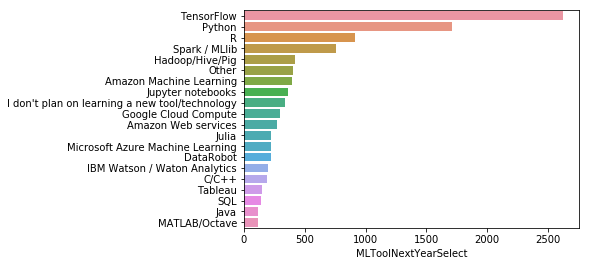

In [35]:
data = mcq["MLToolNextYearSelect"].value_counts().head(20)
sns.barplot(y=data.index, x=data)


 구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답.
 그리고 python이 15%, R은 8%
 
 클라우드는 Amazon ML, GCP, AWS, MS Azure ML, IBM Watson순으로 응답

#### 데이터사이언스 방법

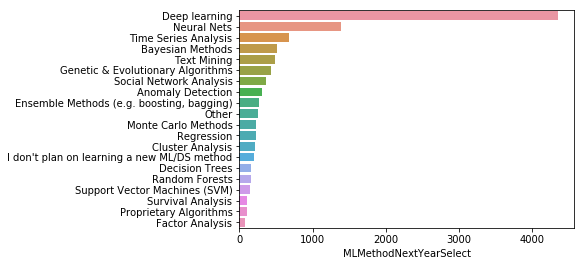

In [36]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

응답에 대한 통계를 보면 딥러닝과 뉴럴넷이 엄청나게 인기가 있을 것이고, 시계열분석, 베이지안, 텍스트 마이닝 등이 뒤를 이음.
중간쯤에 부스팅과 배깅 같은 앙상블 메소드도 있음.

Q3. 어디에서 데이터 사이언스를 배워야 할까?

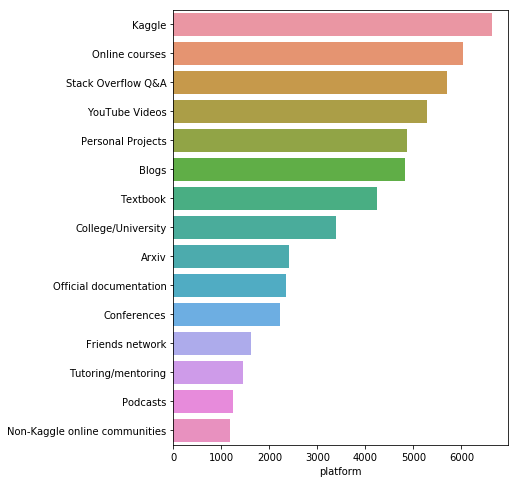

In [37]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
 lambda x: pd.Series(x['LearningPlatformSelect']),
 axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)